In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:16<00:00, 129MB/s]
100% 1.06G/1.06G [00:16<00:00, 71.2MB/s]


In [2]:
import zipfile
zip_rf = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_rf.extractall('/content')
zip_rf.close()

In [26]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import cv2

In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    # labeling 0,1
    label_mode='int',
    # we can't proccess all image at once in our memmory
    batch_size=32,
    # we should set image size ,because our input will contain diffrent image size which needs to be consistant
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    # labeling 0,1
    label_mode='int',
    # we can't proccess all image at once in our memmory
    batch_size=32,
    # we should set image size ,because our input will contain diffrent image size which needs to be consistant
    image_size=(256,256)

)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# We should Normalize the image, we have numpy array with each values range from 0-255
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [67]:
# Model building
model = Sequential()

# Adding convo layer with 32 filter where each filter is 3x3 shape , we use relu in the feature map
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


# Now Flatten the tensor
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 85ms/step - accuracy: 0.5653 - loss: 2.5239 - val_accuracy: 0.7096 - val_loss: 0.5680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 78ms/step - accuracy: 0.7080 - loss: 0.5682 - val_accuracy: 0.7434 - val_loss: 0.5290
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7679 - loss: 0.4861 - val_accuracy: 0.7896 - val_loss: 0.4458
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8051 - loss: 0.4206 - val_accuracy: 0.8052 - val_loss: 0.4303
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.8351 - loss: 0.3629 - val_accuracy: 0.7994 - val_loss: 0.4528
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 85ms/step - accuracy: 0.8736 - loss: 0.2942 - val_accuracy: 0.7918 - val_loss: 0.4830
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9108 - loss: 0.2230 - val_accuracy: 0.8012 - val_loss: 0.5552
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.9344 - loss: 0.1639 - 

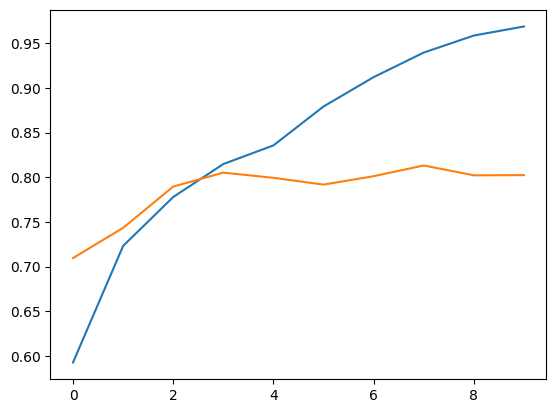

In [73]:
 plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

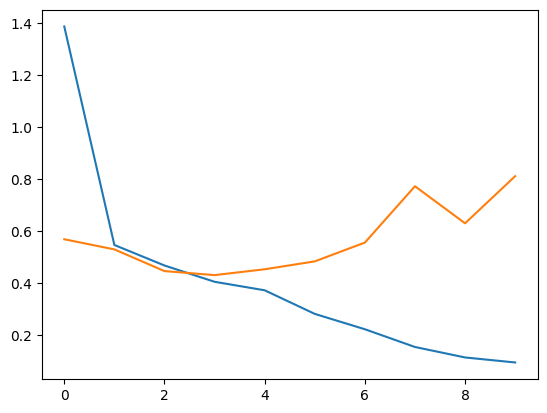

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [105]:
test_image = cv2.imread('/content/ai-generated-stray-cat-in-danger-background-animal-background-photo.jpg')

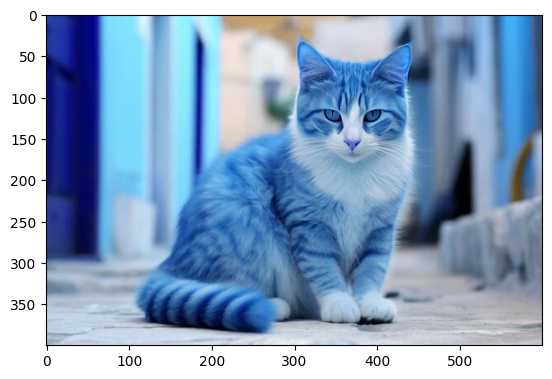

In [106]:
plt.imshow(test_image)

In [107]:
test_image.shape

(400, 600, 3)

In [108]:
test_image = cv2.resize(test_image,(256,256))

In [109]:
test_image = test_image.reshape((1,256,256,3))

In [110]:
test_image = test_image/255

In [111]:
model.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.00409154]], dtype=float32)

In [114]:
def predict_cat_dog(img_dir):
  test_image = cv2.imread(img_dir)
  test_image = cv2.resize(test_image,(256,256))
  plt.imshow(test_image)
  test_image = test_image.reshape((1,256,256,3))
  pred = model.predict(test_image)
  print(pred)
  if pred[0]<=0.5:
    return "It is a Cat"
  else:
    return "it is a Dog"

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
[[0.9968226]]


'it is a Dog'

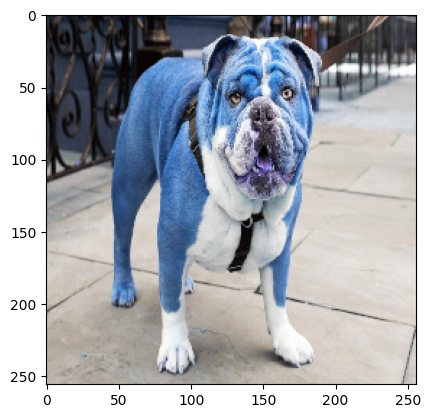

In [116]:
predict_cat_dog("/content/english-dog-breeds-4788340-hero-14a64cf053ca40f78e5bd078b052d97f.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.5364807]]


'it is a Dog'

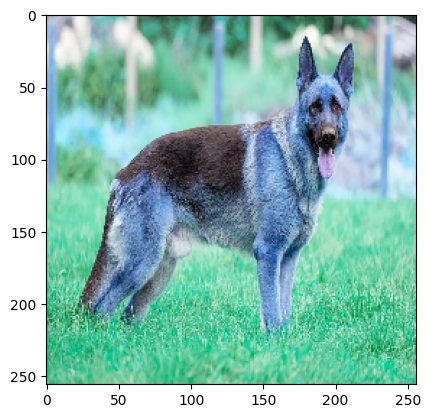

In [117]:
predict_cat_dog("/content/German-Shepherd-dog-Alsatian.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.9984781]]


'it is a Dog'

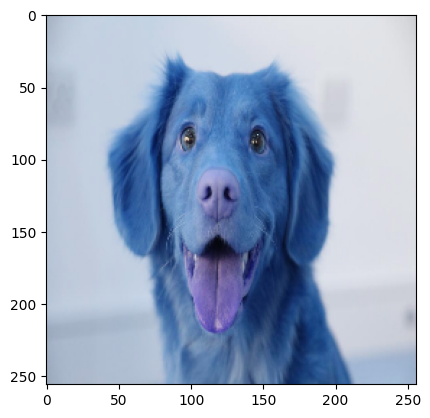

In [118]:
predict_cat_dog("/content/golden-retriever-puppy.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.8572059]]


'it is a Dog'

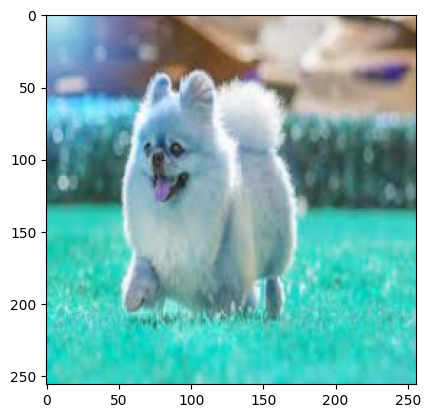

In [119]:
predict_cat_dog("/content/dog_download.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.01073255]]


'It is a Cat'

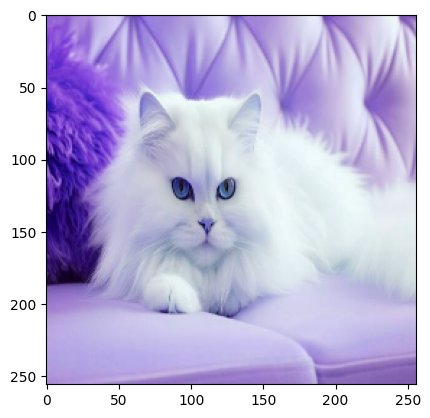

In [120]:
predict_cat_dog("/content/white-cat-pink-sofa-generate-ai-photo.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[1.665784e-07]]


'It is a Cat'

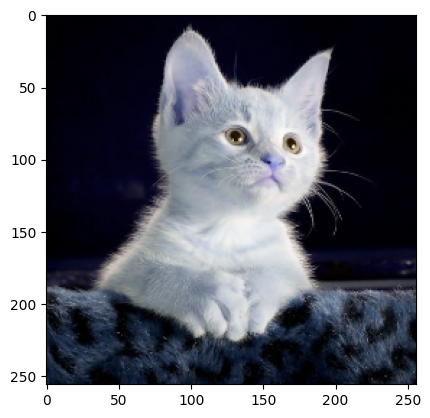

In [121]:
predict_cat_dog("/content/kitty-cat-kitten-pet-45201.jpeg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
[[0.47797465]]


'It is a Cat'

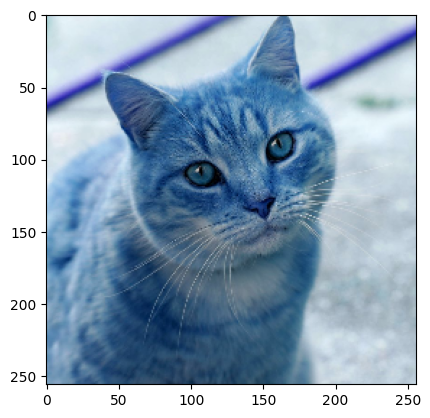

In [123]:
predict_cat_dog("/content/cat.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.05559352]]


'It is a Cat'

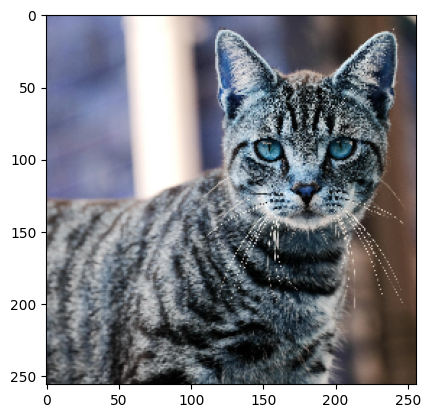

In [124]:
predict_cat_dog("/content/cat2.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.9947141]]


'it is a Dog'

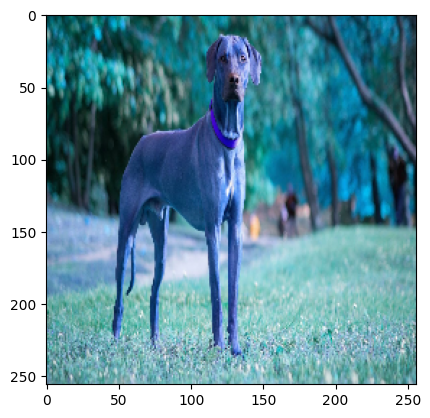

In [125]:
predict_cat_dog("/content/lat.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[0.7520036]]


'it is a Dog'

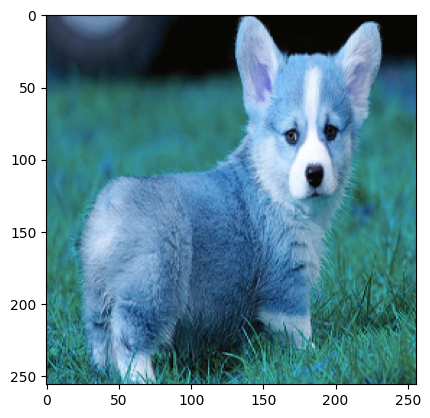

In [127]:
predict_cat_dog("/content/la2.webp")